In [4]:
import pandas as pd

import os
from pathlib import Path
import sys

module_path = Path( os.getcwd() )
module_path = module_path.parent.parent.parent.__str__() + '\\Pesticide'

cwd = module_path

folder_path = os.path.join(cwd,'data')

sys.path.insert(0, module_path)

df2 = pd.read_csv(os.path.join(folder_path,'combined_df.csv') ,index_col=0 )
# change data type of columns
df2['date_of_sampling'] = pd.to_datetime(df2['date_of_sampling'])


## Content

- Notebooks overview
- Converting Notebooks
- Example useage of notebooks 





# Notebooks
## Jupyter Notebooks

From [TalkPython: Awesome Jupyter Libraries and Extensions](https://talkpython.fm/episodes/show/394/awesome-jupyter-libraries-and-extensions-in-2022)

> Jupyter is an amazing environment for exploring data and generating executable reports with Python. But there are many external tools, extensions, and libraries to make it so much better and make you more productive. 

- A notebook consists of two parts
    - markdown part where we can:
        - write text, add images, links, html, LaTeX etc
    - code part which runs and displays output of code

Some links:

- [Jupyter Book](https://jupyterbook.org/en/stable/intro.html)
- [A curated list of awesome Jupyter projects](https://github.com/markusschanta/awesome-jupyter)
- [Code Documentation QA of Code](https://best-practice-and-impact.github.io/qa-of-code-guidance/code_documentation.html#generating-html-documentation)
- [FastAI guide for better blogs](https://www.fast.ai/posts/2019-05-13-blogging-advice.html)





## Example of a notebook
 
An example notebook

![](ghtop_images/jupyter.png)



## Example of a notebook: output

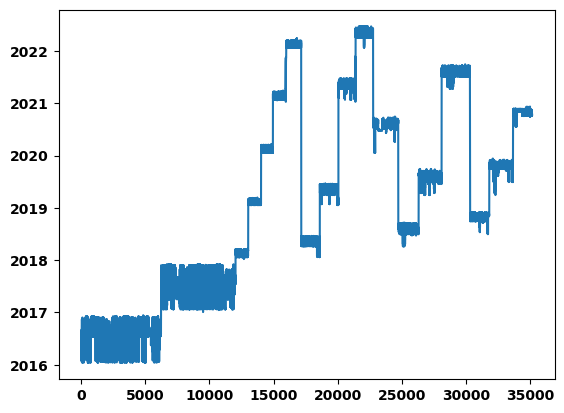

In [8]:
import matplotlib.pyplot as plt
plt.plot(df2['date_of_sampling'])

## Example of a notebook: output 2

In [10]:
import altair as alt
from vega_datasets import data

movies = alt.UrlData(
    data.movies.url,
    format=alt.DataFormat(parse={"Release_Date":"date"})
)
ratings = ['G', 'NC-17', 'PG', 'PG-13', 'R']
genres = ['Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western']

base = alt.Chart(movies, width=200, height=200).mark_point(filled=True).transform_calculate(
    Rounded_IMDB_Rating = "floor(datum.IMDB_Rating)",
    Hundred_Million_Production =  "datum.Production_Budget > 100000000.0 ? 100 : 10",
    Release_Year = "year(datum.Release_Date)"
).transform_filter(
    alt.datum.IMDB_Rating > 0
).transform_filter(
    alt.FieldOneOfPredicate(field='MPAA_Rating', oneOf=ratings)
).encode(
    x=alt.X('Worldwide_Gross:Q', scale=alt.Scale(domain=(100000,10**9), clamp=True)),
    y='IMDB_Rating:Q',
    tooltip="Title:N"
)

# A slider filter
year_slider = alt.binding_range(min=1969, max=2018, step=1)
slider_selection = alt.selection_single(bind=year_slider, fields=['Release_Year'], name="Release Year_")


filter_year = base.add_selection(
    slider_selection
).transform_filter(
    slider_selection
).properties(title="Slider Filtering")

# A dropdown filter
genre_dropdown = alt.binding_select(options=genres)
genre_select = alt.selection_single(fields=['Major_Genre'], bind=genre_dropdown, name="Genre")

filter_genres = base.add_selection(
    genre_select
).transform_filter(
    genre_select
).properties(title="Dropdown Filtering")

#color changing marks
rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['MPAA_Rating'], bind=rating_radio, name="Rating")
rating_color_condition = alt.condition(rating_select,
                      alt.Color('MPAA_Rating:N', legend=None),
                      alt.value('lightgray'))

highlight_ratings = base.add_selection(
    rating_select
).encode(
    color=rating_color_condition
).properties(title="Radio Button Highlighting")

# Boolean selection for format changes
input_checkbox = alt.binding_checkbox()
checkbox_selection = alt.selection_single(bind=input_checkbox, name="Big Budget Films")

size_checkbox_condition = alt.condition(checkbox_selection,
                                        alt.SizeValue(25),
                                        alt.Size('Hundred_Million_Production:Q')
                                       )

budget_sizing = base.add_selection(
    checkbox_selection
).encode(
    size=size_checkbox_condition
).properties(title="Checkbox Formatting")

( filter_year | filter_genres) &  (highlight_ratings | budget_sizing  )

alt.VConcatChart(...)

## Communicating when code is a large element of what is being presented

- Microsoft Word/ppt- type methods aren't set-up well to include code
- Programming files (e.g. `.py`) aren't set-up well to share
- Videoing code with outputs is an option, but don't translate to other formats (i.e. we may also need to do a written format of this)
- Apps (e.g. streamlit) can be good. 
    - But the code is hidden
- Programming notebooks (e.g.`.ipynb`) offer a good and easy to share code but with some limitations
 
An easier way is to convert the notebooks to html

- e.g. maybe someone doesn't have python installed 



## Notebook Benefits

- Notebooks are **intuitive**
    - You have the code then the result of the code
    - Plus can add details of how code works
    - And it's linear
- Can get things up and working **quickly**
- Aid with communicating code
- Encourages **Writing** 
    - and writing things down aids thinking in the now and understanding what you did and why in the future  
- Can use shell commands e.g. `!pip install pandas`
- Can use [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) e.g. `%%time` to time a cell

With the ONS moving towards Python/R from Excel and a varied level of skills. The first of these is particularly important to aid communicating code


# Converting Notebooks

## What I have used to convert notebooks

-  [fastpages](https://fastpages.fast.ai/)
    - Previously I converted notebooks to html via fastpages but this is now deprecated and they are recommending the use of quarto. 
-  [quarto](https://quarto.org/)
    - So far I have found **quarto** really good and flexible (*N.B. R works too*) 
    -  Easy to convert a notebook to multiple formats, including html, powerpoint, pdf, word doc
    -  **BUT** Quarto is not possible within ONS (as far as I can tell currently)
-  [nbconvert](https://nbconvert.readthedocs.io/en/latest/) is another option I tried
    -  but it doesn't seem to have the functionality of fastpages or quarto. 
-  [Jupyter Books](https://jupyterbook.org/en/stable/intro.html) seems to be the best option within ONS
    -  Maybe not as good as quarto but it works!


## Others

- I know some people use [Sphinx](https://www.sphinx-doc.org/en/master/), 
    - is recommended by QA 
    - From what [I can tell sphinx](https://www.sphinx-doc.org/en/master/tutorial/index.html) on it's own is not as easy to use as notebooks
    - But there is a jupyter extension [nbsphinx](https://nbsphinx.readthedocs.io/en/0.8.10/) 
    - Jupyter Books uses Sphinx heavily [under the hood](https://jupyterbook.org/en/stable/explain/sphinx.html)
- [nbdev](https://nbdev.fast.ai/getting_started.html) 
    - I think is connected to quarto
- [Voila](https://github.com/voila-dashboards/voila)
    - Voilà turns Jupyter notebooks into standalone web applications.
    - Looks good, bit like streamlit 
    - but seems to interfere with other libraries and not checked whether works in ONS
    - [mercury](https://github.com/mljar/mercury) seems similar


- Anything else people use and recommend?

## Quarto Outputs

We can then create different files from this .ipynb Jupyter notebook using the following code:

- `quarto render testPres.ipynb --to pptx`
- `quarto render testPres.ipynb --to pdf`
- `quarto render testPres.ipynb --to html`
- `quarto render testPres.ipynb --to revealjs`

or for Jupyter Books
- `jupyter-book build .\PesticideDocs\`


## Creating a webpage from this

Takes about 30 mins including installing chosen converter. *(But can be done much quicker)*

- create a Github repo for your website
- choose the converter (e.g. Jupyter Books)
    - And follow their instructions
- go to settings -> Pages within the repo
    - few options to do
- Optional: add your own website url to it
    
Link how to do this [here](https://kirenz.github.io/codelabs/codelabs/jupyter-book/#7)

# Examples

## Example: Documenting Code

- [Here](https://thomashsimm.github.io/PesticideDocs/UK_areas.html) is my website for my research project on pesticides in UK food.

- This is not the same as documentation for a package but there are parallels 

This does a few things:

- Documents the analysis steps I have taken including the code and outputs
    - Useful for data transparency, useability of the code if needs modifiying/adapting, and why I did XYZ
- Provides a way to present the data
    - There is a streamlit app, but sometimes I like to be able to see the code

![](ghtop_images/pest.png)

## Example: Discussing Code

- GP Tables example

## Example: Tool to aid learning

A big area I have been using Jupyter Notebooks for is to aid learning

- If you want to understand something it helps to write it down
- Having the code next to it is a big advantage
- And if stored on github you can access it anywhere

[Tensoflow cheat sheet](https://thomashsimm.com/tensorflow/2022/09/28/Tensorflow.html)
![](ghtop_images/tflow.png)

## Example: Debugging Code

- Since starting at ONS I have been working with understanding an existing project and latterly adding code to it
- The project consists of multiple python files across several folders
    - My Python was good but lots of the functions and their useage weren't immediately obvious to me 
- **break-points** in VS Studio is really good to step through the code and work out what happens in the code.
    - I had not used before with Python (but had lots with MATLAB), and it's really useful
- But it can be limited what you can do
    - difficult to probe code if want to write more than 1 line of code
    - the experience/knowledge exists as you go through it but no documentation to refer to later, e.g. function X does this when I give it Y etc
- By copying and pasting code into Jupyter cells I could see and document how they worked (e.g. changing inputs)
    - This (copying and pasting) would get around code changes too (which would be an issue if modules were just imported)
    - because this was all done in Jupyter notebook I can have a ipynb code file and a html file showing how the code works
    - I could even save a pickle file of the variables at a particularly point to understand how the code would work from this point
 

## Presenting in multiple formats

- Jupyter notebooks can be used on their own or as html
- But can also be used to create presentations, pdf/word documentation or even books
- This presentation was done with Quarto using the `revealjs` format
    - So it is a presentation format but with a html file
- Some of these file types can be difficult within ONS framework to do
    - I hit a wall when trying to go beyond html and docs with Jupyter books due to dependencies

## Presenting in multiple formats: video

![](ghtop_images/vid.mp4)


## Questions/ Comments

- Thoughts on:
    - using notebooks
    - documenting code
    - encouraging communication of code across ONS areas and experiences
- Can we share html files? Or do we have to work within the current framework?
- Anything else?